## Bibliotecas e informações sobre as colunas do Dataset

In [322]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OrdinalEncoder
from yellowbrick.features.pca import PCADecomposition
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import plotly.express as px
import joblib
import threadpoolctl
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('marketing_campaign.csv', sep = '\t')

In [4]:
df.head(100)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7516,1983,Graduation,Married,30096.0,1,0,22-05-2014,30,5,...,6,0,0,0,0,0,0,3,11,0
96,7247,1960,Graduation,Widow,47916.0,0,1,22-11-2012,72,505,...,6,0,1,0,0,0,0,3,11,0
97,11100,1972,Graduation,Divorced,51813.0,1,1,11-04-2013,37,51,...,7,0,0,0,0,0,0,3,11,0
98,4646,1951,2n Cycle,Married,78497.0,0,0,01-12-2013,44,207,...,2,0,0,0,1,0,0,3,11,0


In [11]:
df.isnull().sum()/len(df)

ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Z_CostContact          0.0
Z_Revenue              0.0
Response               0.0
dtype: float64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [13]:
print('Quantidade de linhas ANTES de tirar os nulos: ' + str(df.shape[0]))

Quantidade de linhas ANTES de tirar os nulos: 2216


In [14]:
df.dropna(inplace = True)
print('Quantidade de linhas DEPOIS de tirar os nulos: ' + str(df.shape[0]))

Quantidade de linhas DEPOIS de tirar os nulos: 2216


In [15]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [16]:
df.describe(include = 'object')

,Education,Marital_Status,Dt_Customer
count,2216,2216,2216
unique,5,8,662
top,Graduation,Married,31-08-2012
freq,1116,857,12


## Tratamento de Colunas

### Coluna Education

In [17]:
df['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [18]:
df['Education'] = df['Education'].replace({'Basic' : 1, '2n Cycle':1, 'Graduation':2, 'Master':3, 'PhD':4})

In [19]:
df['Education'].value_counts()

2    1116
4     481
3     365
1     254
Name: Education, dtype: int64

### Coluna Marital Status

In [20]:
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [21]:
df['Marital_Status'] = df['Marital_Status'].replace({'Married':2, 'Together':2, 'Single':1, 'Divorced':1, 'Widow':1, 'Alone':1, 'Absurd':1, 'YOLO':1})

In [22]:
df['Marital_Status'].value_counts()

2    1430
1     786
Name: Marital_Status, dtype: int64

### Coluna Age

In [23]:
df['Age'] = 2015 - df['Year_Birth']

In [24]:
df.drop(columns = ['Year_Birth'], axis = 1, inplace = True)

### Coluna Spent

In [25]:
[i for i in df.columns if 'Mnt' in i]

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds']

In [26]:
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

### Coluna Family Size

In [27]:
df['Family_size'] = df['Kidhome'] + df['Teenhome'] + df['Marital_Status']

### Coluna Parent

In [28]:
df['Parent'] = df['Kidhome'] + df['Teenhome']

In [29]:
df['Parent'] = np.where(df['Parent'] > 0,1,0)

### Tratamento de Data

In [30]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format = '%d-%m-%Y')

In [31]:
df['Dt_Customer'].min()

Timestamp('2012-07-30 00:00:00')

In [32]:
df['Life_Time'] = (df['Dt_Customer'] - df['Dt_Customer'].min()).dt.days

### Tratamento de Respostas as Promoções

In [71]:
df['Total_Response'] = df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['Response']

## EDA

### Matriz de Correlação

<AxesSubplot:>

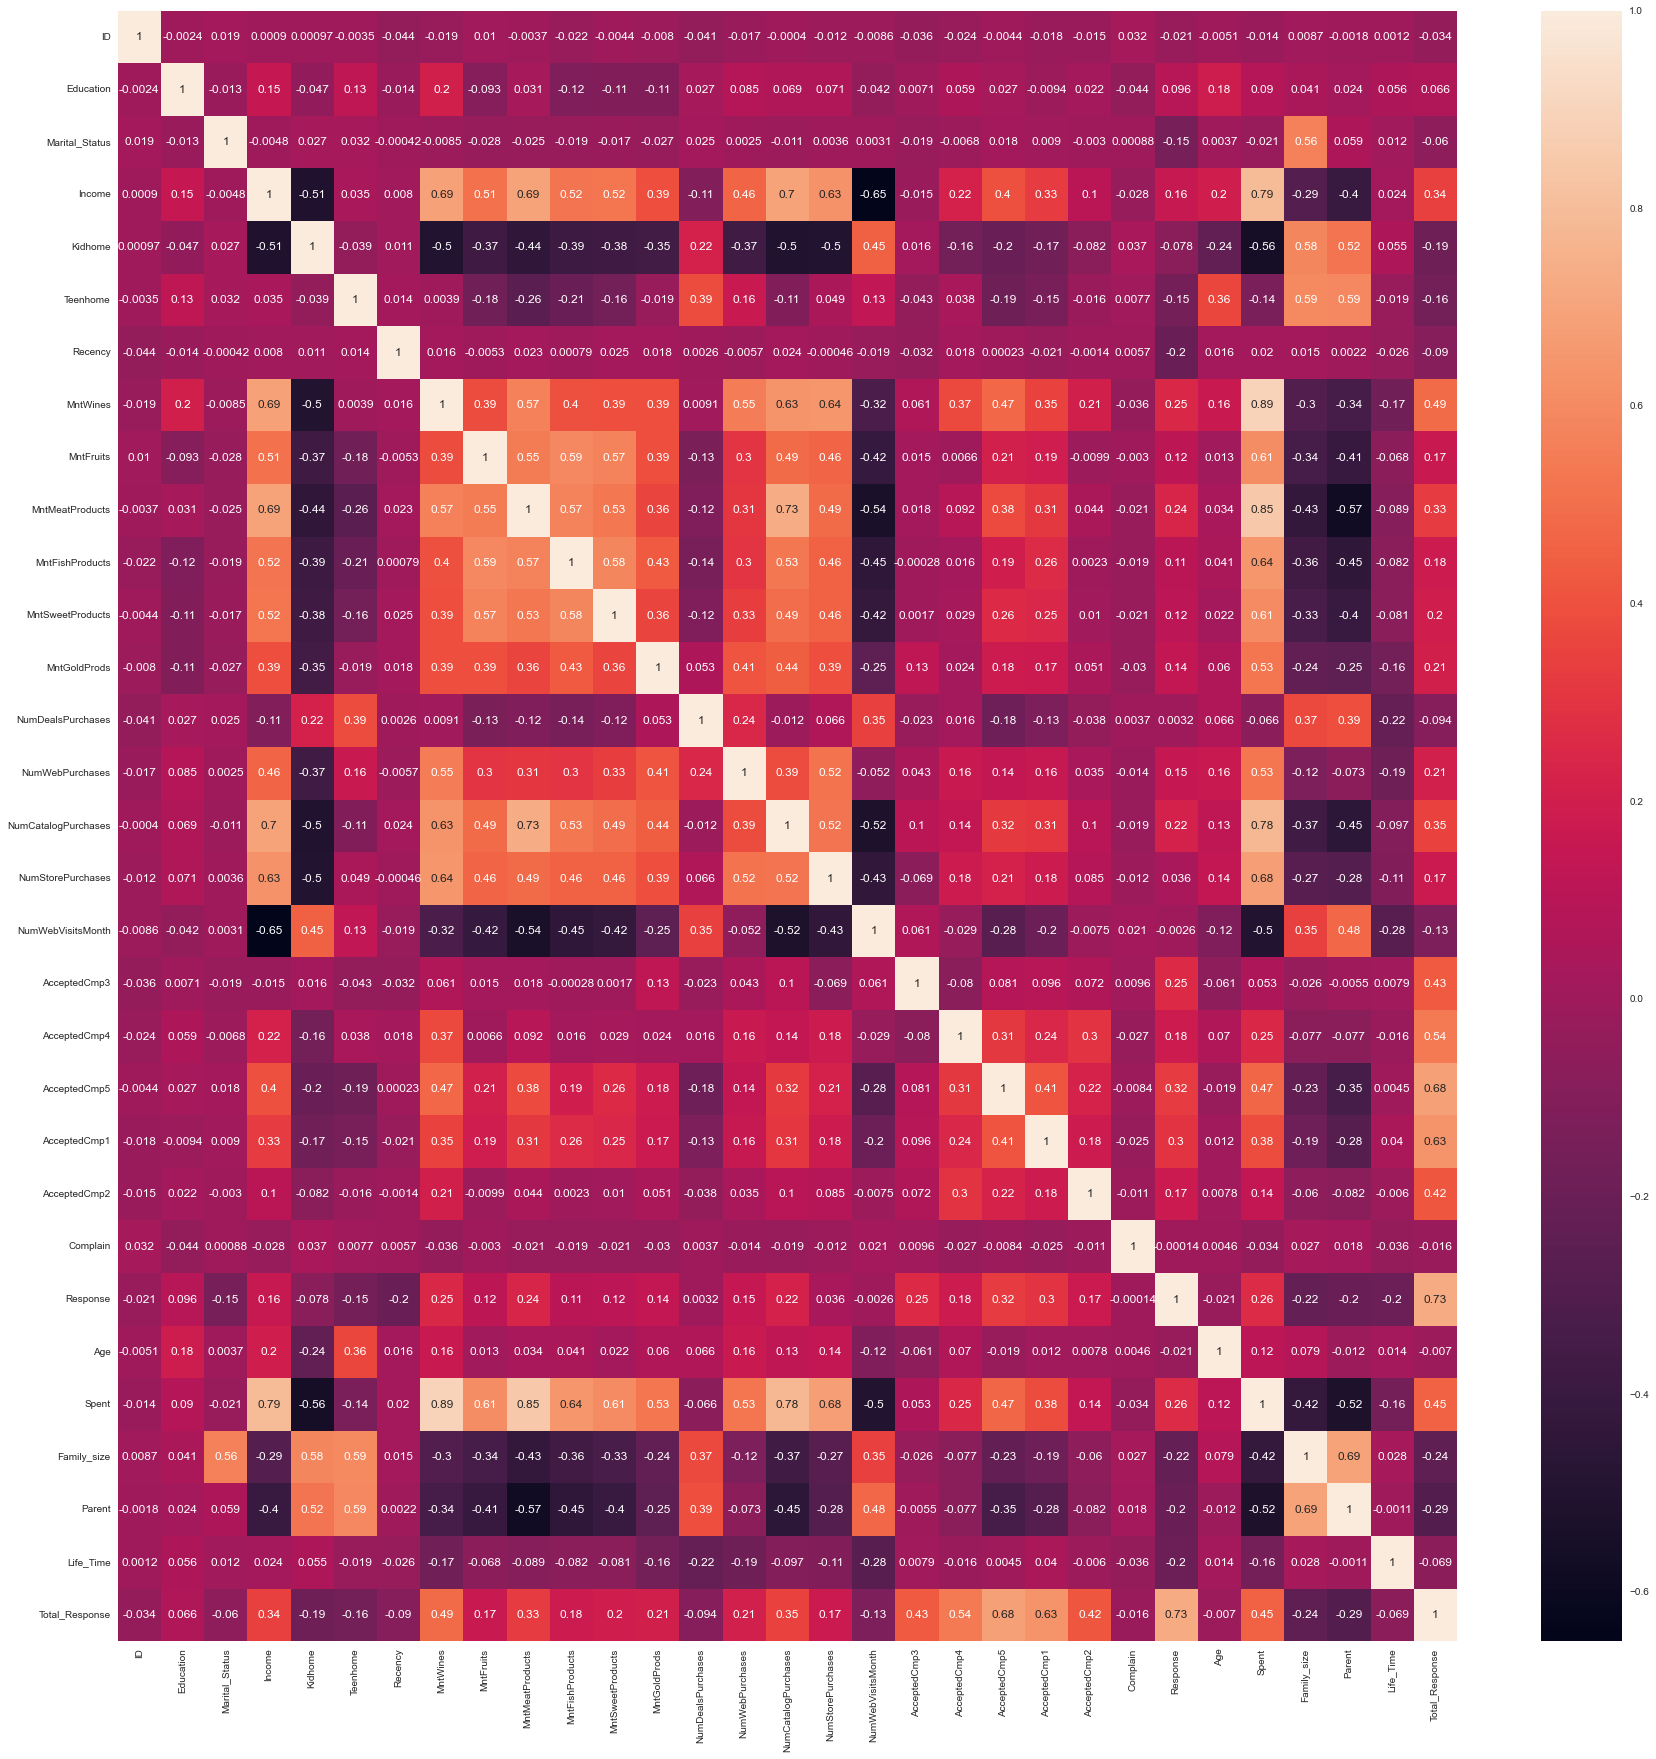

In [72]:
plt.figure(figsize = (30,30))
sns.heatmap(df.corr(), annot = True)

In [35]:
df.drop([i for i in df.columns if 'Z_' in i], axis = 1, inplace = True)

### Boxplots - Tirando Outliers

<AxesSubplot:ylabel='Age'>

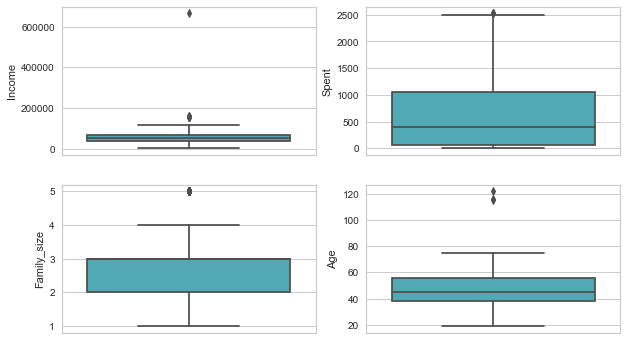

In [36]:
fig, axes = plt.subplots(2,2, figsize=(10,6))
sns.boxplot(data = df, y = 'Income', ax=axes[0][0], palette = 'YlGnBu')
sns.boxplot(data = df, y = 'Spent', ax=axes[0][1], palette = 'YlGnBu')
sns.boxplot(data = df, y = 'Family_size', ax=axes[1][0], palette = 'YlGnBu')
sns.boxplot(data = df, y = 'Age', ax=axes[1][1], palette = 'YlGnBu')

In [37]:
df = df[df['Income'] < 600000]
df = df[df['Age'] < 90]

### Countplots

<AxesSubplot:xlabel='Family_size', ylabel='count'>

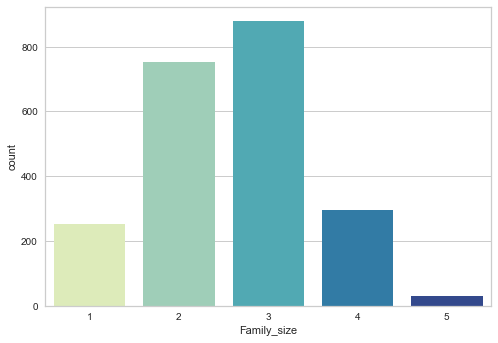

In [38]:
sns.countplot(data = df, x = 'Family_size', palette = 'YlGnBu')

<AxesSubplot:xlabel='Education', ylabel='count'>

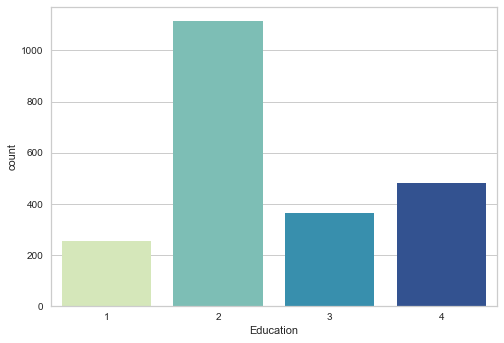

In [39]:
sns.countplot(data = df, x = 'Education', palette = 'YlGnBu')

### Histogramas

<AxesSubplot:xlabel='Total_Response', ylabel='Density'>

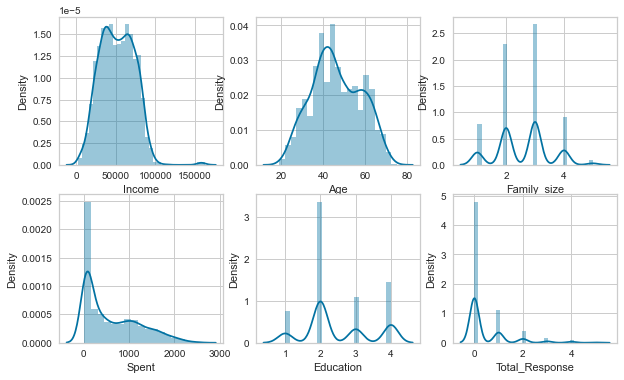

In [263]:
fig, axes = plt.subplots(2,3, figsize=(10,6))
sns.distplot(df['Income'], ax=axes[0][0])
sns.distplot(df['Age'], ax=axes[0][1])
sns.distplot(df['Family_size'], ax=axes[0][2])
sns.distplot(df['Spent'], ax=axes[1][0])
sns.distplot(df['Education'], ax=axes[1][1])
sns.distplot(df['Total_Response'], ax=axes[1][2])

## Criação dos Grupos de Análise

### Grupo com a maioria das colunas

In [73]:
grupo_1 = df.drop(columns = ['ID', 'Dt_Customer'])

In [74]:
grupo_1.shape

(2212, 30)

### Grupo com informações demográficas

In [75]:
grupo_2 = df[['Education', 'Marital_Status', 'Income', 'Age', 'Spent', 'Family_size', 'Parent', 'Life_Time', 'Total_Response']]

In [76]:
grupo_2.shape

(2212, 9)

## PCA

### PCA - Grupo 1

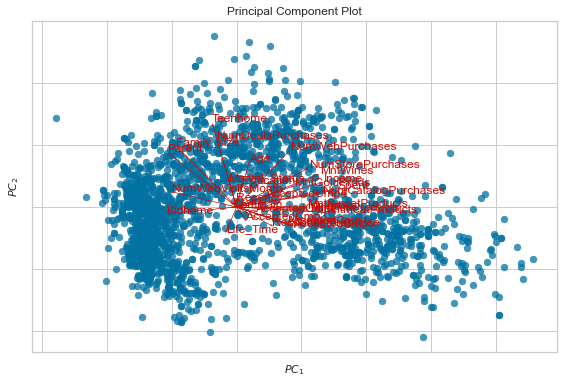

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [233]:
X_1 = grupo_1
norm = StandardScaler().fit(X_1)
X_norm_1 = norm.transform(X_1)

visualizer = PCADecomposition(scale=True, proj_features=True,)


visualizer.fit_transform(pd.DataFrame( X_norm_1, columns=X_1.columns))
visualizer.show()

In [251]:
pca_1 = PCA(0.7)
pca_1.fit(X_norm_1)

pc1 = pca_1.transform(X_norm_1)[:,0]
pc2 = pca_1.transform(X_norm_1)[:,1]
pc3 = pca_1.transform(X_norm_1)[:,2]

import plotly.express as px

fig = px.scatter_3d(x=pc1, y=pc2, z=pc3)
fig.show();

In [252]:
grupo_1_componentes = pd.DataFrame(pca_1.components_, columns = X_1.columns).T
grupo_1_componentes

,0,1,2,3,4,5,6,7,8
Education,0.016441,0.128980,0.100903,-0.295123,-0.279965,-0.264426,0.442366,-0.025484,0.404752
Marital_Status,-0.026222,0.148917,-0.005808,-0.146786,0.609205,0.036592,0.272325,0.082491,0.046222
Income,0.280898,0.139616,-0.050653,-0.179956,0.038938,-0.071500,0.019120,0.009661,0.019952
Kidhome,-0.225463,-0.036298,0.118292,0.119220,0.264375,-0.018168,0.116454,-0.039467,0.120426
Teenhome,-0.080036,0.474423,0.042100,-0.146056,-0.064397,-0.135455,-0.256960,0.002260,-0.130922
Recency,-0.001470,0.036361,-0.082350,-0.058028,0.043890,0.389929,-0.370056,-0.271210,0.701614
MntWines,0.269473,0.185563,0.128065,-0.049511,-0.072102,0.097592,0.110406,-0.012471,0.098655
MntFruits,0.224886,-0.007716,-0.178369,0.143564,0.138690,-0.048700,-0.038881,0.017207,-0.088149
MntMeatProducts,0.279038,-0.028666,-0.083000,0.024487,0.085478,-0.038941,0.161447,0.017215,0.149355
MntFishProducts,0.234725,-0.017507,-0.182680,0.136317,0.149391,-0.022357,-0.054394,-0.002353,-0.101545


### PCA - Grupo 2

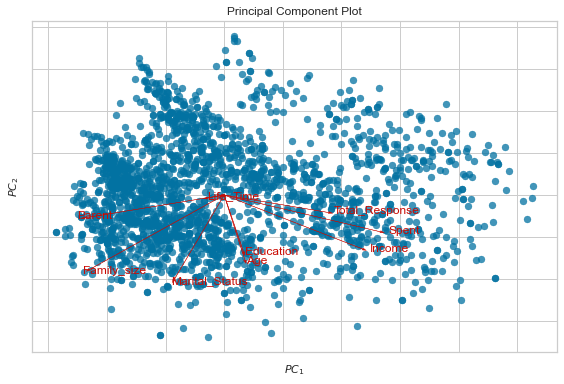

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [240]:
X_2 = grupo_2
norm = StandardScaler().fit(X_2)
X_norm_2 = norm.transform(X_2)

visualizer = PCADecomposition(scale=True, proj_features=True,)


visualizer.fit_transform(pd.DataFrame( X_norm_2, columns=X_2.columns))
visualizer.show()

In [253]:
plt.figure(figsize = (6,6))
p1 = sns.scatterplot(data=pca_1.transform(X_std_1), x='PC1', y='PC2')
for line in range(0, loadings.shape[0]):
    p1.text(loadings.iloc[line, 0] + 0.05,
            loadings.iloc[line, 1],
            loadings.index[line],
            horizontalalignment='left',
            size='medium',
            color='black')

ValueError: Could not interpret value `PC1` for parameter `x`

<Figure size 432x432 with 0 Axes>

In [248]:
pca_2 = PCA(0.7)
pca_2.fit(X_norm_2)

pc1 = pca_2.transform(X_norm_2)[:,0]
pc2 = pca_2.transform(X_norm_2)[:,1]
pc3 = pca_2.transform(X_norm_2)[:,2]

import plotly.express as px

fig = px.scatter_3d(x=pc1, y=pc2, z=pc3)
fig.show();

In [249]:
pca_2.n_components_

4

In [250]:
grupo_2_componentes = pd.DataFrame(pca_2.components_, columns = X_2.columns)
grupo_2_componentes

,Education,Marital_Status,Income,Age,Spent,Family_size,Parent,Life_Time,Total_Response
0,0.062753,-0.161932,0.447537,0.067266,0.504829,-0.435116,-0.451618,-0.053960,0.337604
1,-0.358218,-0.532247,-0.339038,-0.410287,-0.230910,-0.467645,-0.143629,-0.018743,-0.110085
2,0.527529,-0.478695,-0.006981,0.453488,-0.165617,-0.165061,0.079144,0.431662,-0.198981
3,0.174375,-0.310163,-0.098923,0.266184,0.031739,-0.000646,0.233000,-0.858441,0.023107


In [247]:
pca_2.transform(X_std_2)

array([[ 2.99985106,  1.0081689 , -0.05695193,  1.58432826, -1.06537607],
       [-1.04557938,  0.42039318,  1.70672916, -0.22067592, -0.9772157 ],
       [ 1.23878201, -0.13919414, -0.35185487, -0.86728936, -1.21721929],
       ...,
       [ 2.38728893,  1.96518441,  0.19964295, -1.13029674,  0.27932477],
       [-0.15835958, -1.66691413,  0.85750533, -0.61189735, -0.54526709],
       [-0.9619022 , -2.19335604,  0.27868097,  1.65729386,  0.61020419]])

## KMeans

### KMeans - Grupo 1

#### Normalização - Grupo 1

In [85]:
scaler = StandardScaler()
X_std_1 = scaler.fit_transform(grupo_1)

#### Métricas de avaliação - Grupo 1

##### Cotovelo - Grupo 1

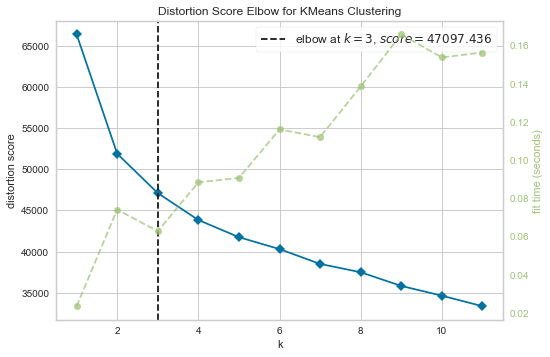

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=11), k=(1, 12))

In [86]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(X_std_1)
visualizer.show()
visualizer

##### Silhueta - Grupo 1

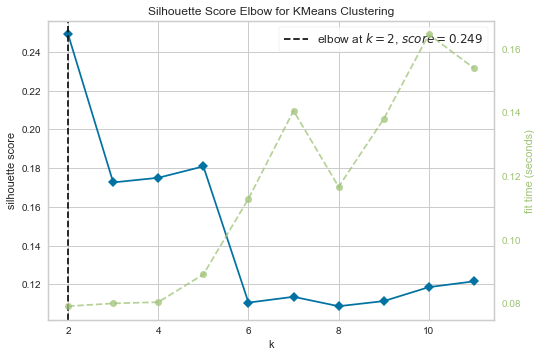

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>,
                 estimator=KMeans(n_clusters=11), k=(2, 12),
                 metric='silhouette')

In [88]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), metric = 'silhouette')

visualizer.fit(X_std_1)
visualizer.show()
visualizer

### KMeans - Grupo 2

#### Normalização - Grupo 2

In [89]:
scaler = StandardScaler()
X_std_2 = scaler.fit_transform(grupo_2)

#### Métricas de Avaliação - Grupo 2

##### Cotovelo - Grupo 2

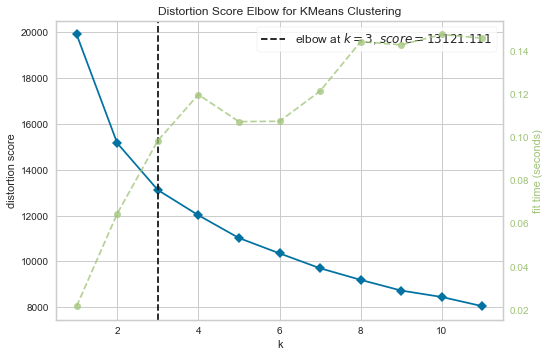

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=11), k=(1, 12))

In [90]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(X_std_2)
visualizer.show()
visualizer

##### Silhueta - Grupo 2

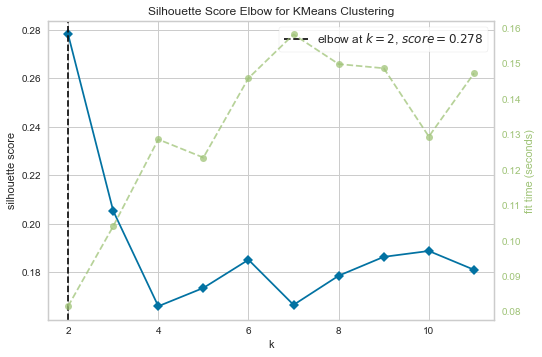

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>,
                 estimator=KMeans(n_clusters=11), k=(2, 12),
                 metric='silhouette')

In [92]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), metric = 'silhouette')

visualizer.fit(X_std_2)
visualizer.show()
visualizer

### KMeans - Grupo PCA

#### Métricas de Avaliação - Grupo PCA

##### Cotovelo - Grupo PCA

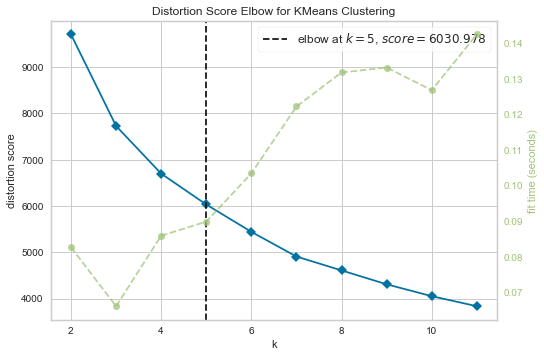

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=11), k=(2, 12))

In [259]:
model_3 = KMeans()
visualizer = KElbowVisualizer(model_3, k=(2,12))

visualizer.fit(pca_2.transform(X_std_2))
visualizer.show()
visualizer

##### Silhueta - Grupo PCA

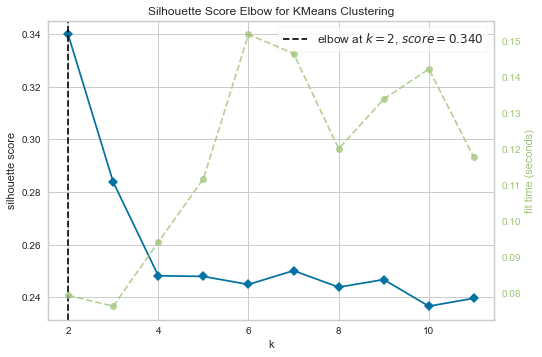

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>,
                 estimator=KMeans(n_clusters=11), k=(2, 12),
                 metric='silhouette')

In [257]:
model_3 = KMeans()
visualizer = KElbowVisualizer(model_3, k=(2,12), metric = 'silhouette')

visualizer.fit(pca_2.transform(X_std_2))
visualizer.show()
visualizer

In [315]:
kmeans = KMeans(5)
kmeans.fit(pca_2.fit_transform(X_std_2))
df['Clusters'] = kmeans.labels_

In [316]:
df['Clusters'].value_counts()

4    583
0    575
3    496
2    337
1    221
Name: Clusters, dtype: int64

In [317]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'Spent', 'Family_size', 'Parent',
       'Life_Time', 'Total_Response', 'TR_D', 'Clusters'],
      dtype='object')

In [318]:
df.groupby('Clusters')['Education', 'Income', 'Marital_Status', 'Total_Response', 'Life_Time', 'Family_size', 'Parent'].mean()

,Education,Income,Marital_Status,Total_Response,Life_Time,Family_size,Parent
Clusters,,,,,,,
0,2.448696,41971.440000,1.060870,0.227826,337.365217,2.168696,0.857391
1,2.588235,74447.085973,1.000000,1.190045,338.461538,1.072398,0.072398
2,2.540059,77409.691395,1.985163,1.142433,343.370920,2.139466,0.136499
3,1.832661,35121.395161,1.989919,0.157258,338.840726,3.153226,0.903226
4,3.005146,52897.473413,1.977702,0.233276,362.274443,3.373928,0.989708


In [319]:
df['Clusters'].value_counts()

4    583
0    575
3    496
2    337
1    221
Name: Clusters, dtype: int64

## Gaussian Mixture

### Gaussian Mixture - Grupo 1

#### Silhueta - Grupo 1

/var/folders/4x/z7f3ppt51xv6ltctr39t5prh0000gn/T/ipykernel_86648/1956263641.py:20: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.



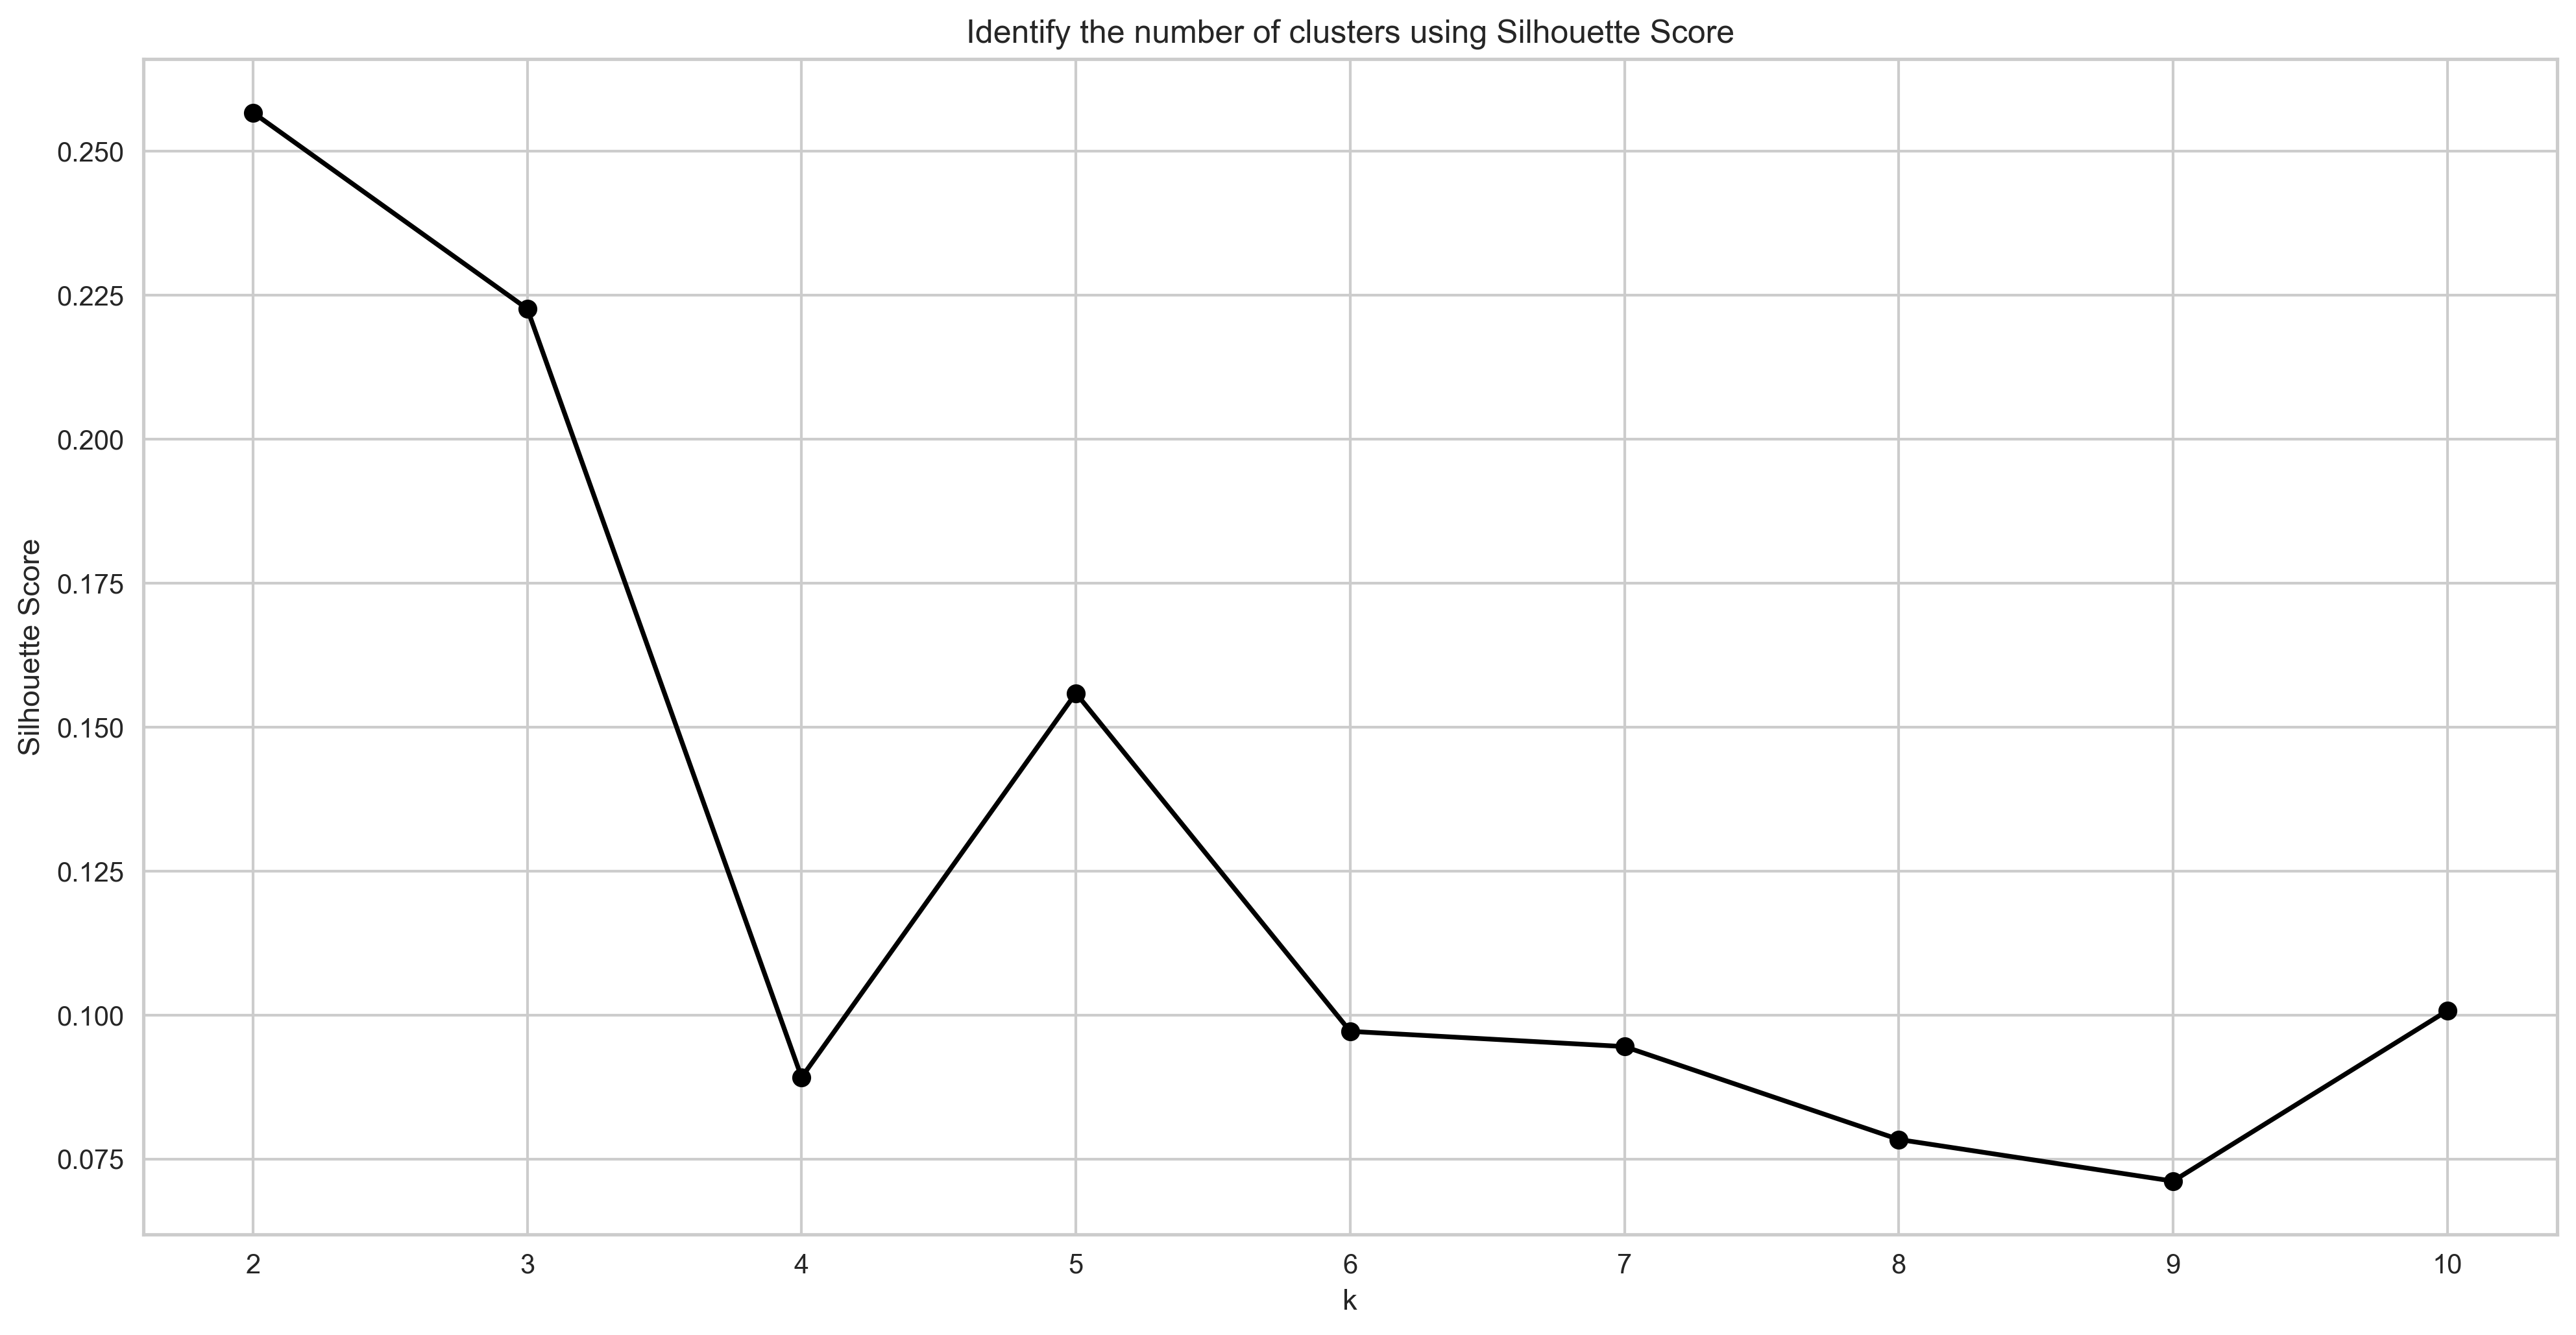

In [95]:
# Create empty list
S=[]

# Range of clusters to try (2 to 10)
K=range(2,11)

# Select data for clustering model
X = X_std_1

for k in K:
    # Set the model and its parameters
    model = GaussianMixture(n_components=k, n_init=20, init_params='kmeans')
    # Fit the model 
    labels = model.fit_predict(X)
    # Calculate Silhoutte Score and append to a list
    S.append(silhouette_score(X, labels, metric='euclidean'))

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=300)
plt.plot(K, S, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()

### Gaussian Mixture - Grupo 2

#### Silhueta - Grupo 2

/var/folders/4x/z7f3ppt51xv6ltctr39t5prh0000gn/T/ipykernel_86648/1919776430.py:20: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.



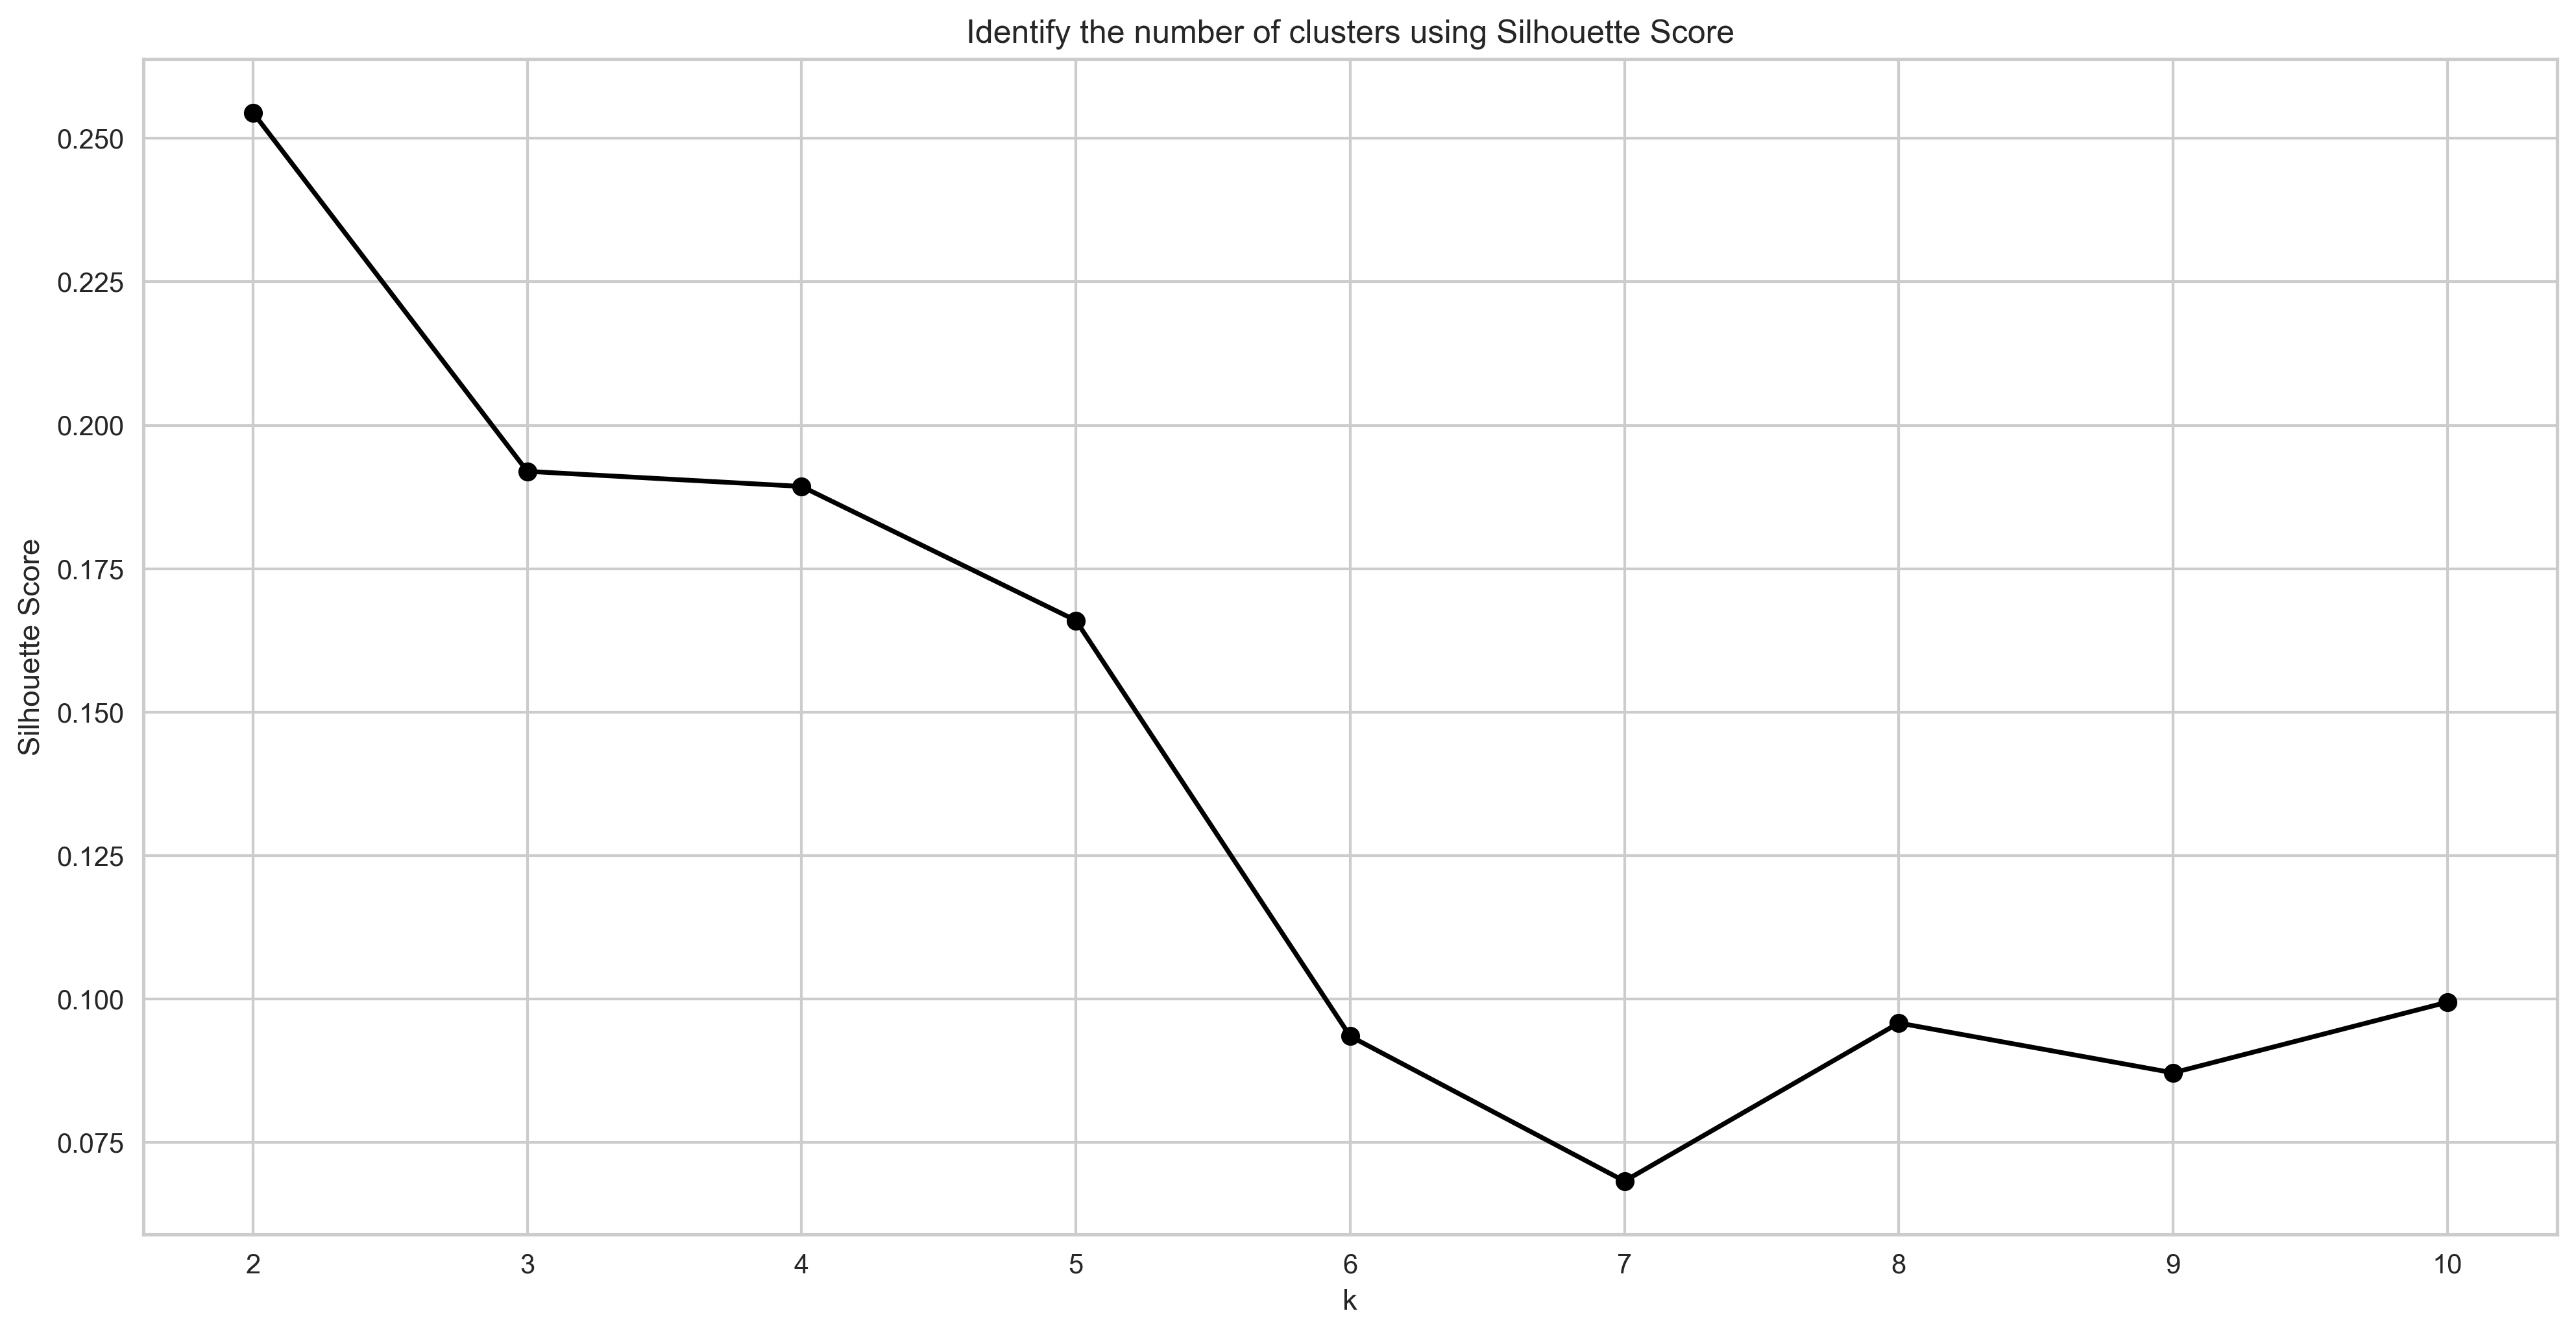

In [299]:
# Create empty list
S=[]

# Range of clusters to try (2 to 10)
K=range(2,11)

# Select data for clustering model
X = X_std_2

for k in K:
    # Set the model and its parameters
    model = GaussianMixture(n_components=k, n_init=20, init_params='kmeans')
    # Fit the model 
    labels = model.fit_predict(X)
    # Calculate Silhoutte Score and append to a list
    S.append(silhouette_score(X, labels, metric='euclidean'))

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=300)
plt.plot(K, S, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()

### Gaussian Mixture - Grupo PCA

#### Silhueta - Grupo PCA

/var/folders/4x/z7f3ppt51xv6ltctr39t5prh0000gn/T/ipykernel_86648/2810490361.py:20: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.



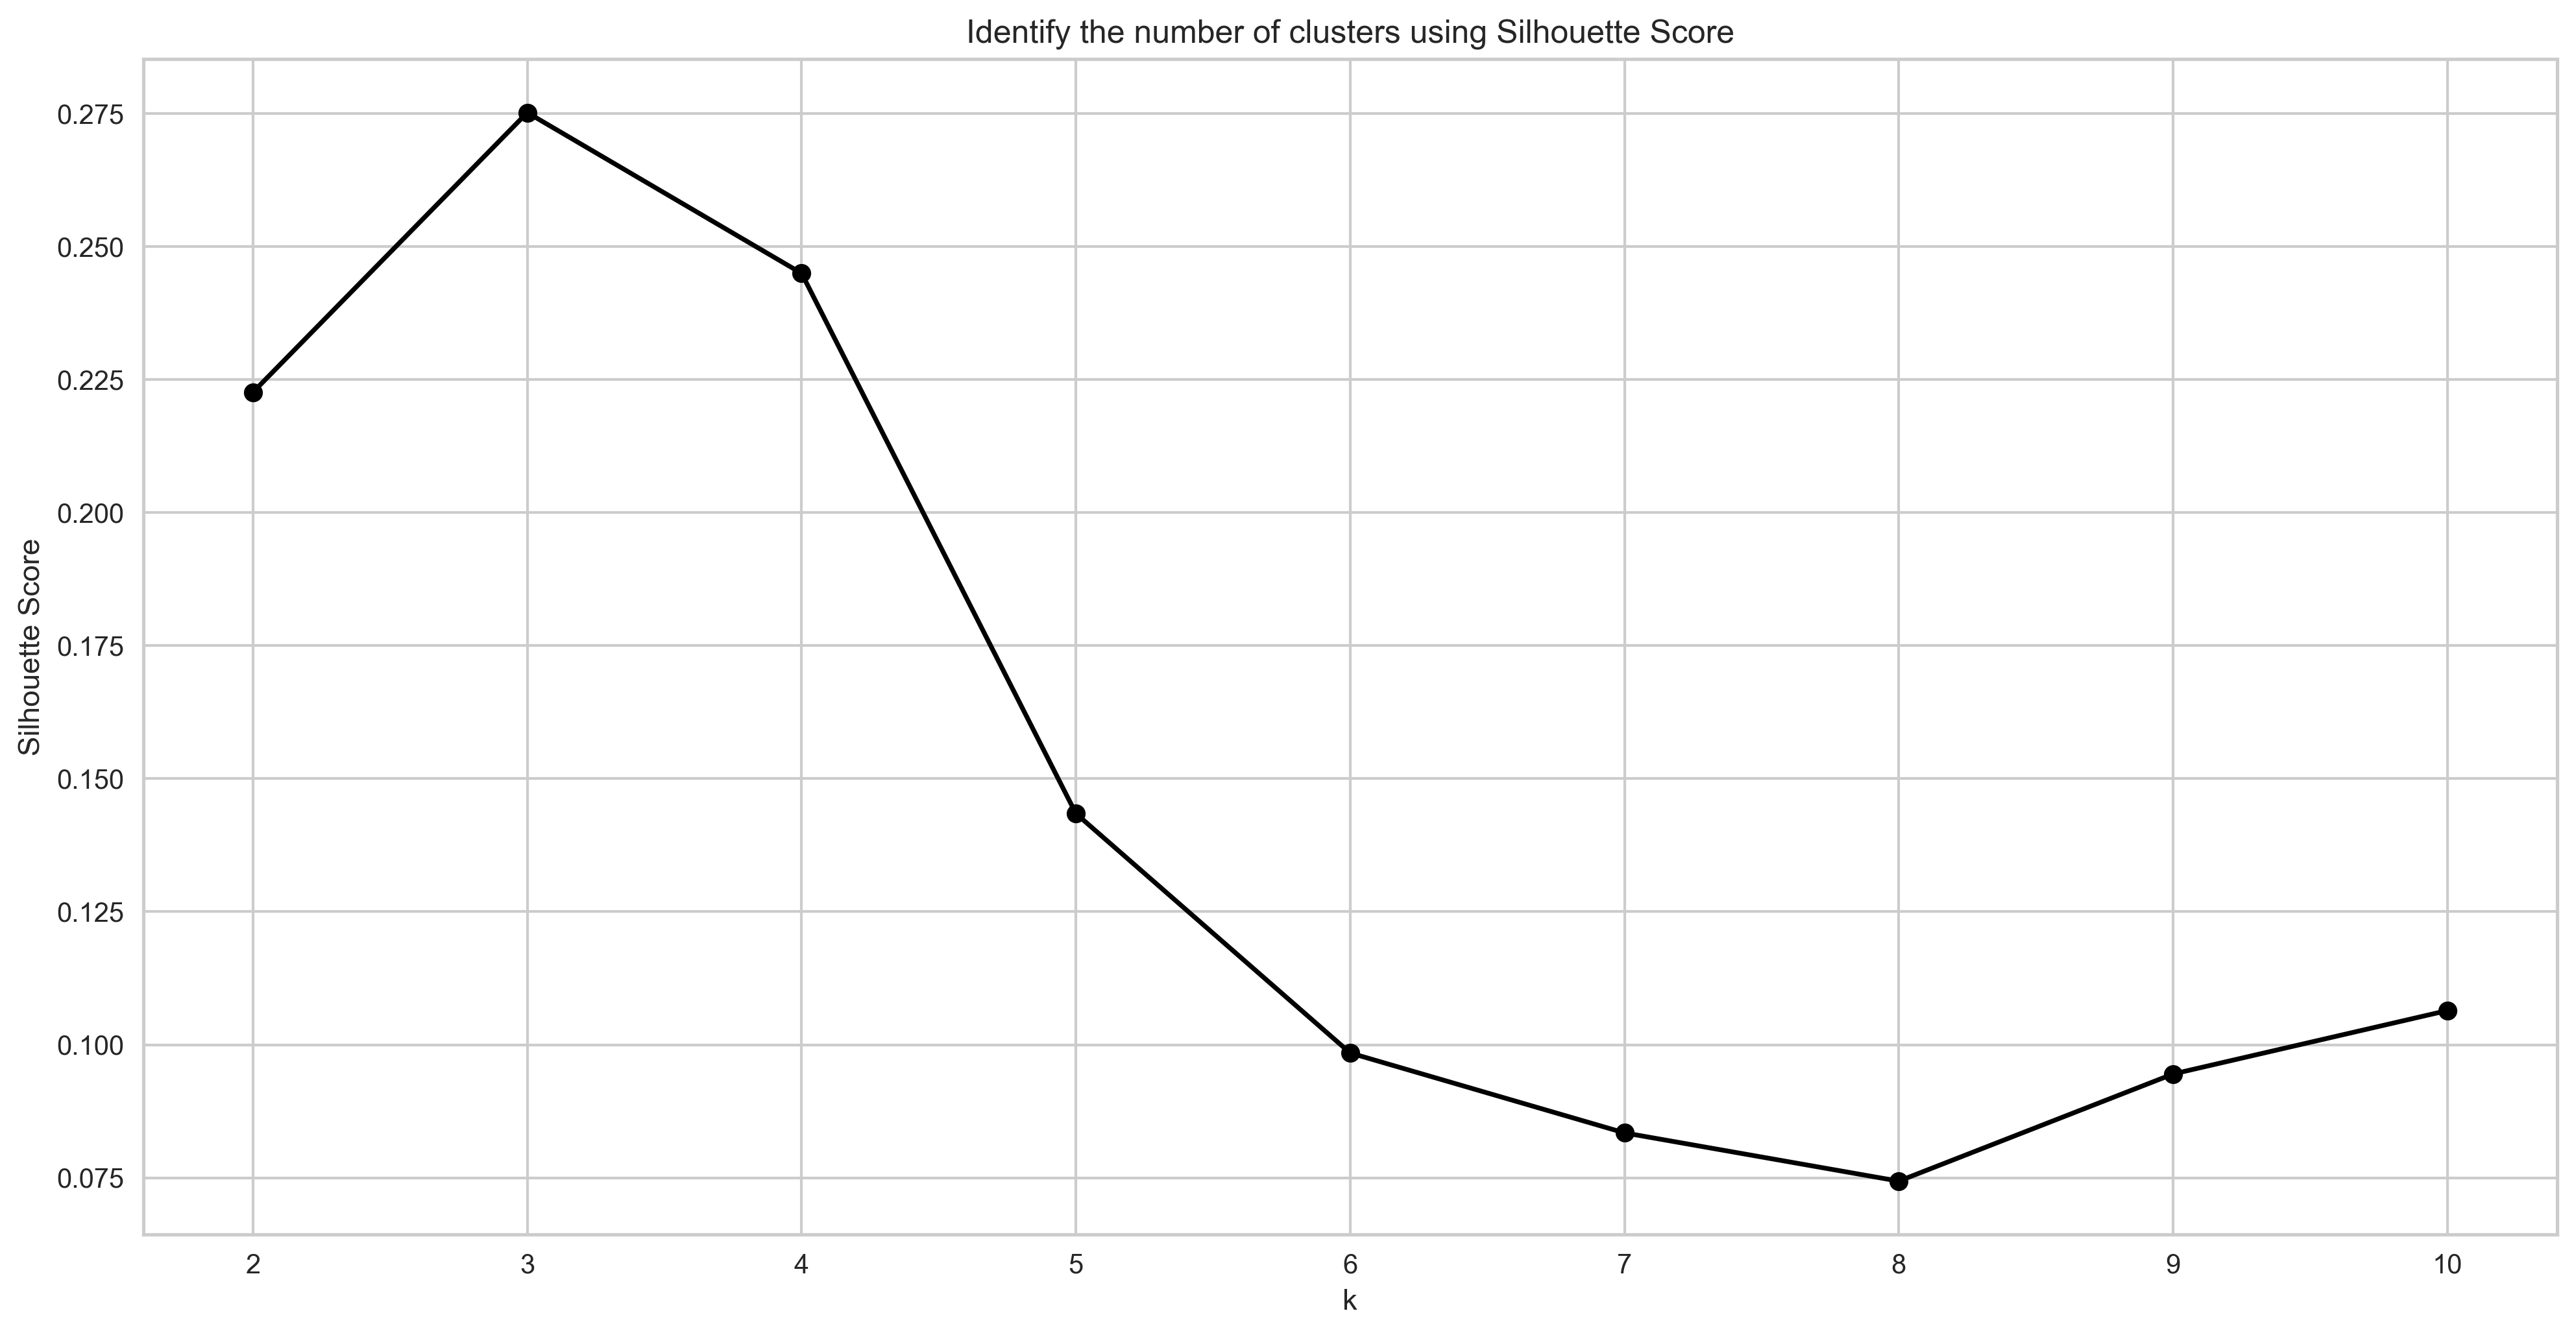

In [300]:
# Create empty list
S=[]

# Range of clusters to try (2 to 10)
K=range(2,11)

# Select data for clustering model
X = pca_2.fit_transform(X_std_2)

for k in K:
    # Set the model and its parameters
    model = GaussianMixture(n_components=k, n_init=20, init_params='kmeans')
    # Fit the model 
    labels = model.fit_predict(X)
    # Calculate Silhoutte Score and append to a list
    S.append(silhouette_score(X, labels, metric='euclidean'))

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=300)
plt.plot(K, S, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()

## Regressão Linear em cima do Spent

### Regressão Linear - Grupo 1

In [139]:
modelo_1 = LinearRegression()

In [162]:
X_1 = grupo_1.drop(['Spent', 'MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'], axis = 1)
y_1 = grupo_1['Spent']

In [163]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

In [164]:
modelo_1.fit(X_train_1, y_train_1)

LinearRegression()

In [165]:
modelo_1.predict(X_test_1)

array([ 7.13624283e+02,  5.31207137e+01,  1.28700204e+03,  2.85766465e+02,
        4.90952781e+02, -4.32231660e-01,  1.22145489e+03,  1.79876969e+03,
        4.49899659e+02, -3.07946527e+02, -6.74576465e+01,  1.07552087e+03,
        1.71456001e+03,  1.01146953e+03,  1.35122295e+03,  4.14270726e+02,
        1.21284259e+03,  8.88100464e+00,  1.49135161e+03,  6.01995258e+02,
        9.36976969e+02,  1.09995438e+02, -4.63428069e+00,  1.23867367e+03,
        1.35440511e+03,  1.08516114e+03,  1.32172797e+02, -2.49147787e+01,
        1.96490558e+00,  5.83225569e+02,  1.48567764e+02, -6.21894317e+01,
        5.73958199e+02,  3.90824391e+02,  3.30888325e+02, -4.47138317e+02,
        9.45065183e+01,  5.44429796e+02,  9.40479946e+02,  1.04440701e+03,
        1.22254952e+03,  1.70465311e+02,  2.04817476e+01,  6.92491127e+02,
        1.06307672e+02,  4.69704545e+02, -1.99816611e+02,  1.02910918e+02,
        1.31187479e+03,  4.86106291e+02,  7.29457199e+02,  1.05115955e+03,
        8.71804126e+02,  

In [166]:
print('O R2 do conjunto de treino é ' + str(modelo_1.score(X_train_1, y_train_1)))
print('O R2 do conjunto de teste é ' + str(modelo_1.score(X_test_1, y_test_1)))

O R2 do conjunto de treino é 0.827639761290718
O R2 do conjunto de teste é 0.8374453944413469


### Regressão Linear - Grupo 2

In [169]:
modelo_2 = LinearRegression()

In [170]:
X_2 = grupo_2.drop(['Spent'], axis = 1)
y_2 = grupo_2['Spent']

In [171]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

In [172]:
modelo_2.fit(X_train_2, y_train_2)

LinearRegression()

In [173]:
modelo_2.predict(X_test_2)

array([ 7.32250749e+02,  1.65816113e+02,  9.16365956e+02,  3.16602341e+02,
        4.03021829e+02,  1.31794653e+00,  1.25683766e+03,  1.66290483e+03,
        4.27703051e+02, -3.43044364e+02,  7.42064425e+01,  1.20475360e+03,
        1.62599571e+03,  1.15660238e+03,  1.23155854e+03,  4.16602028e+02,
        1.37287119e+03,  1.12599849e+02,  1.27445407e+03,  8.14737220e+02,
        5.69079207e+02,  2.05686419e+02,  4.19137981e+00,  8.89680352e+02,
        1.13396629e+03,  1.39435853e+03,  3.51086514e+02, -5.22895155e-01,
        7.61758466e+01,  5.44195132e+02,  9.18801532e+01,  3.97670221e+01,
        6.92837740e+02,  4.46885377e+02,  3.08928801e+02, -6.47162447e+02,
        2.21940454e+02,  5.27343289e+02,  1.23291028e+03,  8.49586462e+02,
        9.65524264e+02,  1.91393589e+02, -7.74058320e+01,  6.17177469e+02,
        2.21274115e+02,  5.34757344e+02, -2.80539462e+02,  1.87797269e+02,
        1.26703121e+03,  6.36460660e+02,  7.66558916e+02,  9.41900894e+02,
        9.27537923e+02,  

In [174]:
modelo_2.score(X_train_2,y_train_2)

0.7405462069211218

In [175]:
modelo_2.score(X_test_2,y_test_2)

0.7297772992845908

### Regressão Linear - Cluster (KMeans com PCA)

In [323]:
modelo_r = joblib.load('regression_model.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'regression_model.pkl'

## Modelo de Classificação em cima de Total Response

### Dumificação da coluna de Total Response

In [268]:
df['TR_D'] = df['Total_Response'].apply(lambda x: 1 if x > 0 else 0)

In [277]:
print('De todos os clientes da base '+str((df['TR_D'].value_counts()[0]/df.shape[0]).round(2)) +' não aceitaram nenhuma promoção')
print('De todos os clientes da base '+str((df['TR_D'].value_counts()[1]/df.shape[0]).round(2)) +' aceitaram pelo menos uma promoção')

De todos os clientes da base 0.73 não aceitaram nenhuma promoção
De todos os clientes da base 0.27 aceitaram pelo menos uma promoção


In [321]:
df.to_csv('marketing_campaign_vf_1.csv')